In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

%matplotlib inline 

## Department Representation

In [4]:
df = pd.DataFrame.from_csv('aclean.csv')

In [5]:
df.head()

,Year,Title,Students,Advisor,Abstract,Student_Year,Student_Major,Advisor_Major
0,1997,"""King Lear"" Through Film: Brook and Kozintsev",Alexandra Parsons,Yu Jin Ko,"The final scene of Shakespeare's ""King Lear"" p...",1997,Unspecified,English
1,1997,The Grotesque Nature of Paradise in Milton's P...,Elizabeth Reich,Jody Mikalachki,In The Interpretacion of Dreams Freud writes t...,1997,Unspecified,English
2,1997,"Eliminating Stereotypes, Identifying Confoundi...",Aimee Jabro-Young,Paul Wink,This study compared differences in political b...,1998,Unspecified,Psychology
3,1997,The Art of Hatred: The Representation of Jewis...,Inna Kantor,Frances Malino,During much of the nineteenth century. Europea...,1997,Unspecified,Jewish Studies
4,1997,"The Problems of, and Possibilities for, Norweg...",Ingrid Moen,Barbara Geller,The goal of my talk is to outline the ways in ...,1997,Unspecified,Religion


In [118]:
df['yes'] = 1
df.head()

,Year,Title,Students,Advisor,Abstract,Student_Year,Student_Major,Advisor_Major,yes
0,1997,"""King Lear"" Through Film: Brook and Kozintsev",Alexandra Parsons,Yu Jin Ko,"The final scene of Shakespeare's ""King Lear"" p...",1997,Unspecified,English,1
1,1997,The Grotesque Nature of Paradise in Milton's P...,Elizabeth Reich,Jody Mikalachki,In The Interpretacion of Dreams Freud writes t...,1997,Unspecified,English,1
2,1997,"Eliminating Stereotypes, Identifying Confoundi...",Aimee Jabro-Young,Paul Wink,This study compared differences in political b...,1998,Unspecified,Psychology,1
3,1997,The Art of Hatred: The Representation of Jewis...,Inna Kantor,Frances Malino,During much of the nineteenth century. Europea...,1997,Unspecified,Jewish Studies,1
4,1997,"The Problems of, and Possibilities for, Norweg...",Ingrid Moen,Barbara Geller,The goal of my talk is to outline the ways in ...,1997,Unspecified,Religion,1


In [121]:
ax = sns.pointplot(data=df, x='Year', y=sum('yes'), hue='Advisor_Major')

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [8]:
depts = df.Advisor_Major.tolist()

In [122]:
years = df.Year.tolist()

In [123]:
dy = zip(depts, years)
dy

[('English', 1997),
 ('English', 1997),
 ('Psychology', 1997),
 ('Jewish Studies', 1997),
 ('Religion', 1997),
 ('Art', 1997),
 ('Religion', 1997),
 ('English', 1997),
 ('English', 1997),
 ('Psychology', 1997),
 ('Religion', 1997),
 ('Religion', 1997),
 ('English', 1997),
 ('English', 1997),
 ('English', 1997),
 ('English', 1997),
 ('English', 1997),
 ('Sociology', 1997),
 ('Chemistry', 1997),
 ('Chemistry', 1997),
 ('Psychology', 1997),
 ('Psychology', 1997),
 ('Psychology', 1997),
 ('Psychology', 1997),
 ('Studio Art', 1997),
 ('English', 1997),
 ('Music', 1997),
 ('Biological Sciences', 1997),
 ('Theatre Studies', 1997),
 ('Astronomy', 1997),
 ('Biological Sciences', 1997),
 ('Biological Sciences', 1997),
 ('Biological Sciences', 1997),
 ('Biological Sciences', 1997),
 ('Biological Sciences', 1997),
 ('Biological Sciences', 1997),
 ('Biological Sciences', 1997),
 ('Chemistry', 1997),
 ('Chemistry', 1997),
 ('Chemistry', 1997),
 ('Chemistry', 1997),
 ('Chemistry', 1997),
 ('Chemistry

In [129]:
up = [] 
for item in dy:
    if ',' in item[0]:
        temp = item[0].split(',')
        for t in temp:
            up.append((t.strip(), item[1]))
    else:
        up.append((item[0].strip(), item[1]))

In [181]:
C = Counter(up)

In [97]:
C['Biological Sciences']= C['Biological Sciences']+7
del C['Women\'s and Gender Studies']
C['WGST'] = 107

In [104]:
most = C.most_common(15)
most

[('Biological Sciences', 333),
 ('Chemistry', 319),
 ('Psychology', 283),
 ('English', 220),
 ('Art', 191),
 ('Economics', 154),
 ('Political Science', 147),
 ('Sociology', 136),
 ('Computer Science', 126),
 ('History', 116),
 ('Unspecified', 112),
 ('WGST', 107),
 ('Music', 105),
 ('Physics', 70),
 ('Spanish', 61)]

In [105]:
depdf = pd.DataFrame(most)

In [106]:
depdf.columns = ['department', 'count']

In [107]:
depdf


,department,count
0,Biological Sciences,333
1,Chemistry,319
2,Psychology,283
3,English,220
4,Art,191
5,Economics,154
6,Political Science,147
7,Sociology,136
8,Computer Science,126
9,History,116


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

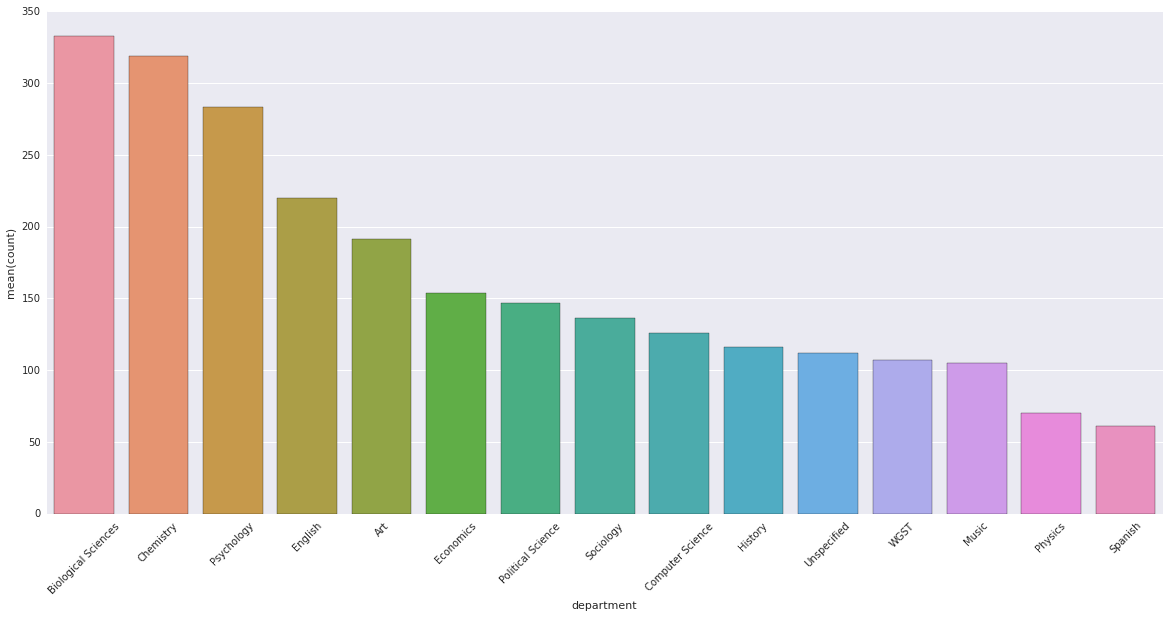

In [108]:
plt.figure(figsize=(20,9))
ax = sns.barplot(x="department", y="count", data=depdf)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

In [ ]:
import plotly
print plotly.__version__  # version >1.9.4 required
from plotly.graph_objs import Scatter, Layout

In [137]:
x = Counter(up)

In [155]:
T = []
for z in x.items():
    temp = (z[0][0], z[0][1], z[1])
    T.append(temp)

In [158]:
nf = pd.DataFrame(T)
nf.columns = ['dept', 'year', 'count']

In [168]:
cs = nf.loc[nf['dept']=='Computer Science']
bio = nf.loc[nf['dept']=='Biological Sciences']
chem = nf.loc[nf['dept']=='Chemistry']
psych = nf.loc[nf['dept']=='Psychology']
english = nf.loc[nf['dept']=='English']
art = nf.loc[nf['dept']=='Art']
econ = nf.loc[nf['dept']=='Economics']
poli = nf.loc[nf['dept']=='Political Science']
soc = nf.loc[nf['dept']=='Sociology']
hist = nf.loc[nf['dept']=='History']

In [178]:
tops = pd.concat([bio, chem, psych, english, art])

In [179]:
tops

,dept,year,count
44,Biological Sciences,2016,11
49,Biological Sciences,2014,8
75,Biological Sciences,2007,15
80,Biological Sciences,1997,10
142,Biological Sciences,2008,23
169,Biological Sciences,2001,15
175,Biological Sciences,1999,15
215,Biological Sciences,2013,15
241,Biological Sciences,2010,26
265,Biological Sciences,2003,12


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

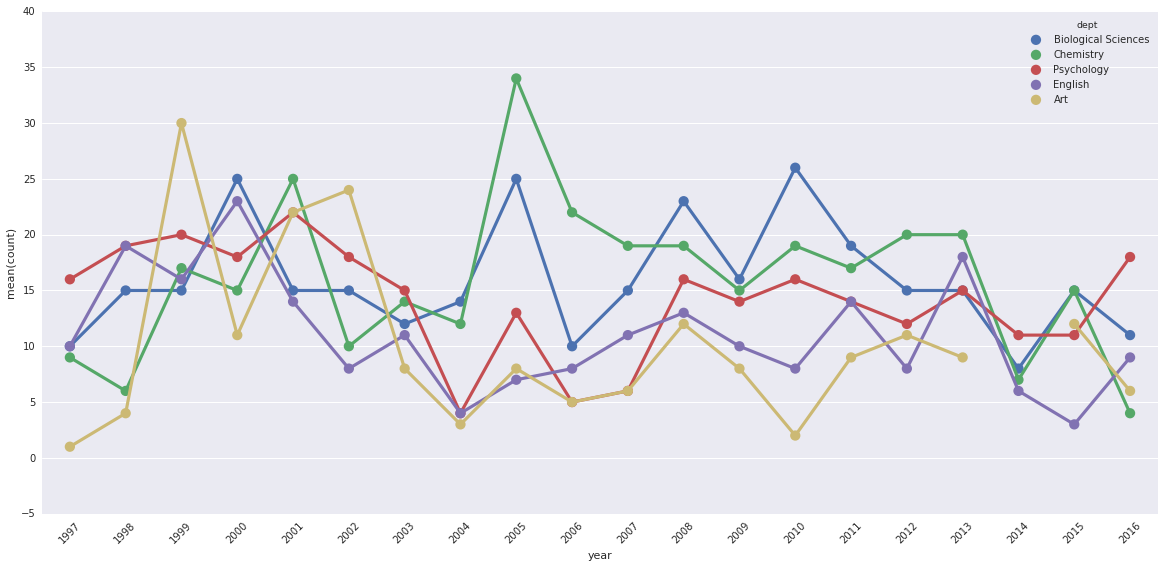

In [180]:
plt.figure(figsize=(20,9))
ax = sns.pointplot(data=tops, x="year", y="count", hue="dept")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)